Top 20 Important Genes:
1. 1711: 0.00976185532819474
2. 5831: 0.009683139574072295
3. 13990: 0.007719511574783102
4. 21832: 0.007438342932457076
5. 3570: 0.006434754324825875
6. 15200: 0.006363232047060126
7. 4766: 0.006207827308979322
8. 1820: 0.006175440629677917
9. 16931: 0.006022347975018265
10. 7719: 0.0057513350023759725
11. 16159: 0.004220430107526882
12. 5581: 0.0041423684932061
13. 12114: 0.004048973323846849
14. 11722: 0.003961560527825588
15. 6767: 0.0038919737506309953
16. 18791: 0.0038659793814432987
17. 6928: 0.0038511803537713734
18. 11726: 0.0038096866096866094
19. 4778: 0.003803786574870912
20. 6530: 0.003763975155279502


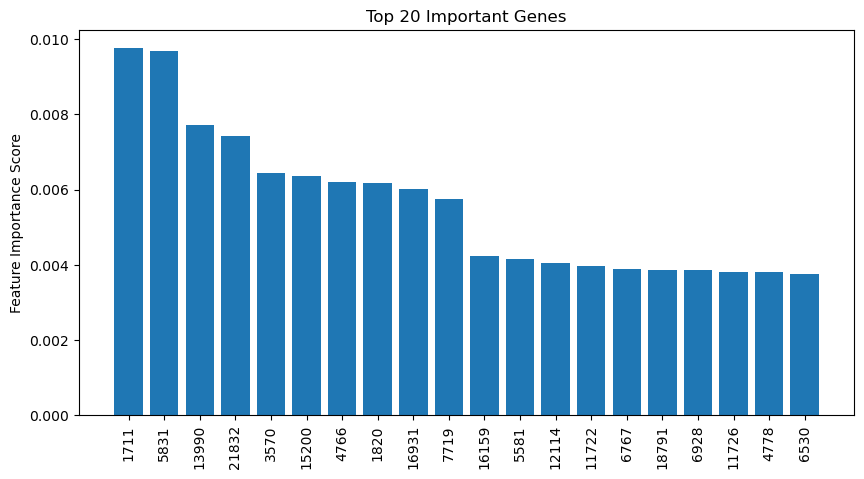

In [ ]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# load dataset
dataset_path = '/Users/tommywalsh/Desktop/Monday_ALL_combined.csv'
df = pd.read_csv(dataset_path, index_col=0)

# define labels
labels = ['Normal_Week0'] * 10 + ['Obese_Week0'] * 10 + ['Normal_Week12'] * 10 + ['Obese_Week12'] * 10

# labels to numeric
label_mapping = {"Normal_Week0": 0, "Obese_Week0": 1, "Normal_Week12": 2, "Obese_Week12": 3}
numeric_labels = np.array([label_mapping[label] for label in labels])

# drop gene identifiers before transposing
X = df.iloc[:, 1:].T

# remove low-variance genes
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X)

# standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, numeric_labels)

# feature importance analysis
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:20]

# get top genes
top_genes = df.index[selector.get_support()][indices]

print("Top 20 Important Genes:")
for i, gene in enumerate(top_genes):
    print(f"{i+1}. {gene}: {importances[indices[i]]}")

plt.figure(figsize=(10, 5))
plt.title("Top 20 Important Genes")
plt.bar(range(20), importances[indices], align='center')
plt.xticks(range(20), top_genes, rotation=90)
plt.ylabel("Feature Importance Score")
plt.show()


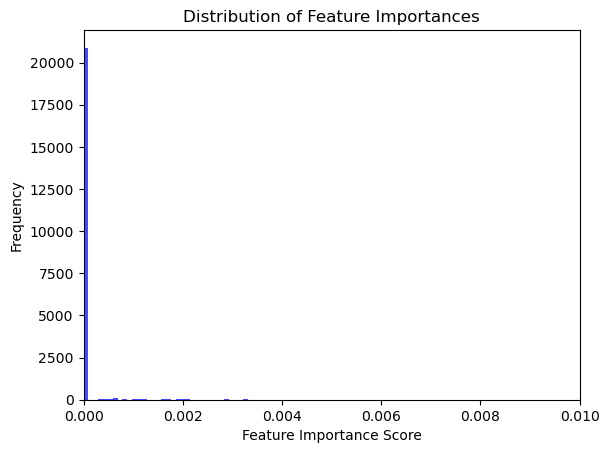

In [ ]:
plt.hist(importances, bins=100, color='blue', alpha=0.7)
plt.xlim(0, 0.01)
plt.xlabel("Feature Importance Score")
plt.ylabel("Frequency")
plt.title("Distribution of Feature Importances")
plt.show()

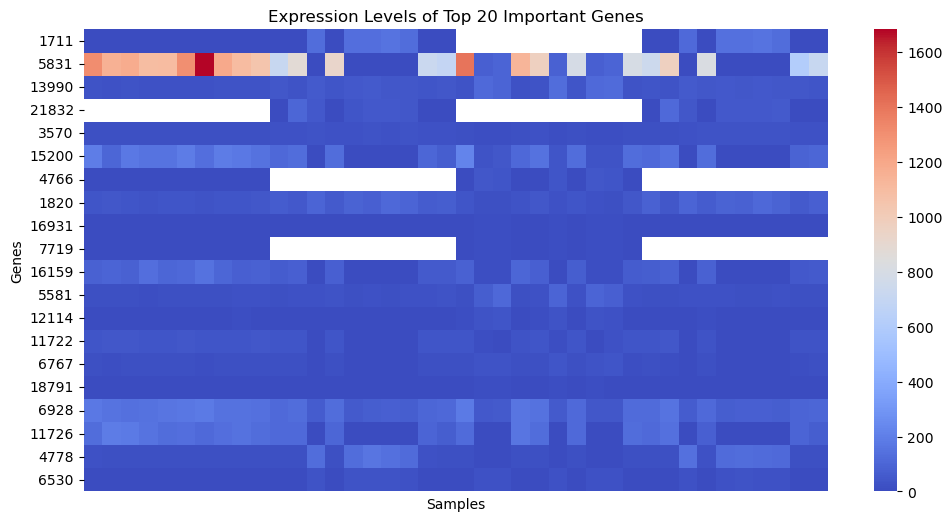

In [ ]:
top_gene_data = X.iloc[:, selector.get_support()][top_genes]

plt.figure(figsize=(12, 6))
sns.heatmap(top_gene_data.T, cmap="coolwarm", xticklabels=False, yticklabels=top_genes, cbar=True)
plt.title("Expression Levels of Top 20 Important Genes")
plt.xlabel("Samples")
plt.ylabel("Genes")
plt.show()


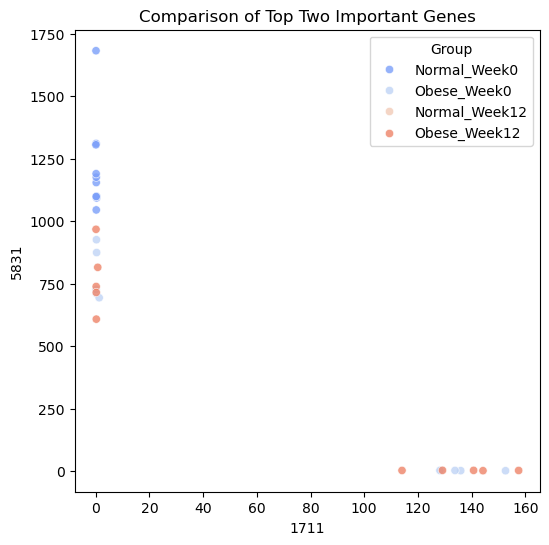

In [ ]:
label_mapping_inverse = {0: "Normal_Week0", 1: "Obese_Week0", 2: "Normal_Week12", 3: "Obese_Week12"}
label_names = [label_mapping_inverse[label] for label in numeric_labels]

gene_1 = top_genes[0]
gene_2 = top_genes[1]

plt.figure(figsize=(6, 6))
sns.scatterplot(x=X[gene_1], y=X[gene_2], hue=label_names, palette="coolwarm", alpha=0.8)
plt.xlabel(gene_1)
plt.ylabel(gene_2)
plt.title("Comparison of Top Two Important Genes")
plt.legend(title="Group")
plt.show()

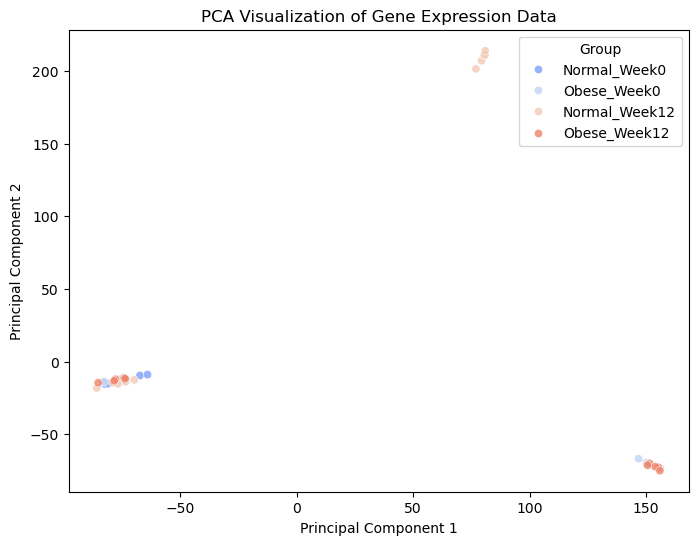

In [ ]:
imputer = SimpleImputer(strategy="mean")  
X_scaled = imputer.fit_transform(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

label_mapping_inverse = {0: "Normal_Week0", 1: "Obese_Week0", 2: "Normal_Week12", 3: "Obese_Week12"}
label_names = [label_mapping_inverse[label] for label in numeric_labels]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=label_names, palette="coolwarm", alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Gene Expression Data")
plt.legend(title="Group")
plt.show()